In [2]:
pip install -q https://github.com/pyannote/pyannote-audio/tarball/develop

Note: you may need to restart the kernel to use updated packages.


In [1]:
DEMO_FILE = {'uri': 'ES2004a.Mix-Headset', 'audio': '/mnt/4dd2488f-d1c5-4d59-85f0-86b7c7057817/Speaker_diri/SRU/ES2003a.wav'}
import pandas as pd

In [2]:
#Segmentation (Each Segment will have only one Speaker)
#%tensorflow_version 1.x
import librosa
import matplotlib.pyplot as plt
from keras import layers
from keras.layers.core import Dense
from keras.models import Sequential
from keras.layers import Bidirectional, TimeDistributed, Dropout
from keras.layers import LSTM
import numpy as np
import keras

2022-12-26 18:33:02.157265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 18:33:02.881438: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-26 18:33:02.881501: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-26 18:33:04.634679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
from pyannote.core import Annotation, Segment

In [4]:
def reference_gen(annotation_path):
  df = pd.read_csv(annotation_path)
  ref_df = df[df['filename'] == 'ES2003a']
  ref_df = ref_df.assign(end = ref_df.Offset + ref_df.Duration)
  ref_df = ref_df[['Speaker_id','Offset','end']]
  ref_records = ref_df.to_records(index=False)
  ref_rec = list(ref_records)
  reference = Annotation()
  for i in range(len(ref_rec)-1):
    reference[Segment(ref_rec[i][1], ref_rec[i][2])] = ref_rec[i][0]

  return reference, ref_df

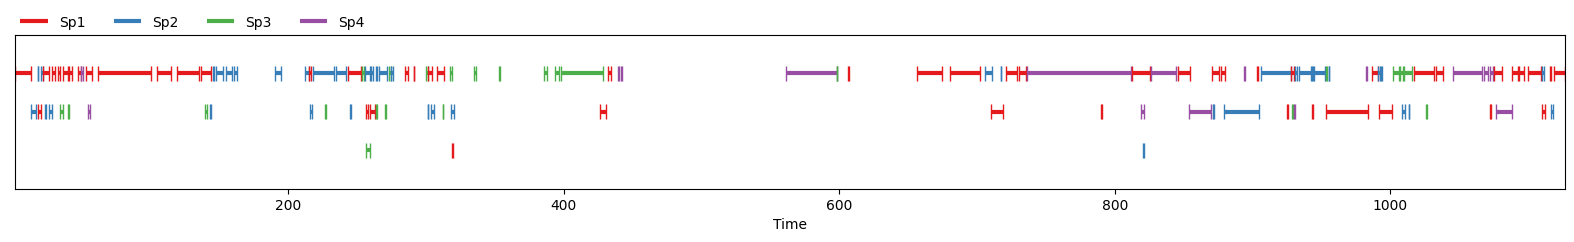

In [5]:
#Give the path for Annotations File of Audio for calculating DER.
reference, ref_df = reference_gen('SRU/ES2003a.csv')
#Visualization (Comparing Between Ground Truth and Hypothesis)
reference

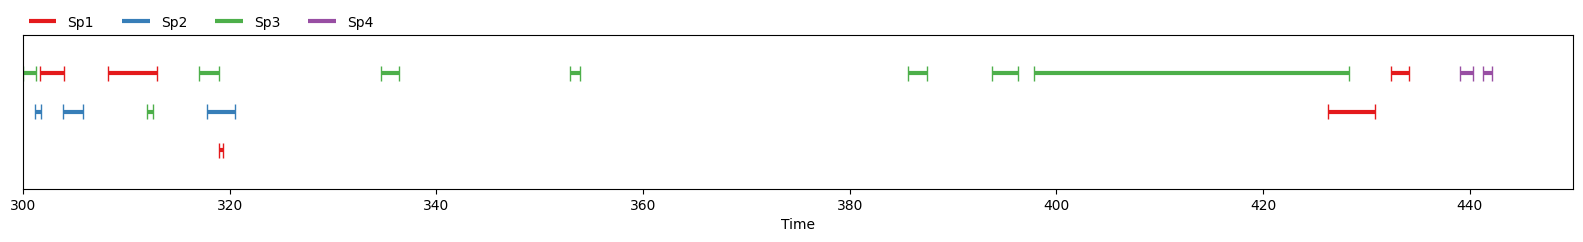

In [6]:
from pyannote.core import Segment, notebook
# make notebook visualization zoom on 600s < t < 660s time range
EXCERPT = Segment(300, 450)
notebook.crop = EXCERPT

# visualize excerpt groundtruth
reference



In [7]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio

# load audio waveform, crop excerpt, and play it
waveform = RawAudio(sample_rate=16000).crop(DEMO_FILE, EXCERPT)
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

In [15]:
pip install pyannote.audio==1.1.2

  Using cached pyannote.audio-1.1.2-py3-none-any.whl (231 kB)
  Attempting uninstall: pyannote.audio
    Found existing installation: pyannote.audio 1.1
    Uninstalling pyannote.audio-1.1:
      Successfully uninstalled pyannote.audio-1.1
Note: you may need to restart the kernel to use updated packages.


In [9]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(DEMO_FILE)


Using cache found in /home/cruz/.cache/torch/hub/pyannote_pyannote-audio_main


  0%|          | 0.00/901 [00:00<?, ?B/s]

  0%|          | 0.00/1.49k [00:00<?, ?B/s]

Using cache found in /home/cruz/.cache/torch/hub/pyannote_pyannote-audio_main


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in /home/cruz/.cache/torch/hub/pyannote_pyannote-audio_main


  0%|          | 0.00/2.40M [00:00<?, ?B/s]

Using cache found in /home/cruz/.cache/torch/hub/pyannote_pyannote-audio_main


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

/home/cruz/miniconda3/envs/myenv/lib/python3.9/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/home/cruz/miniconda3/envs/myenv/lib/python3.9/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /home/cruz/.cache/torch/hub/pyannote_pyannote-audio_main


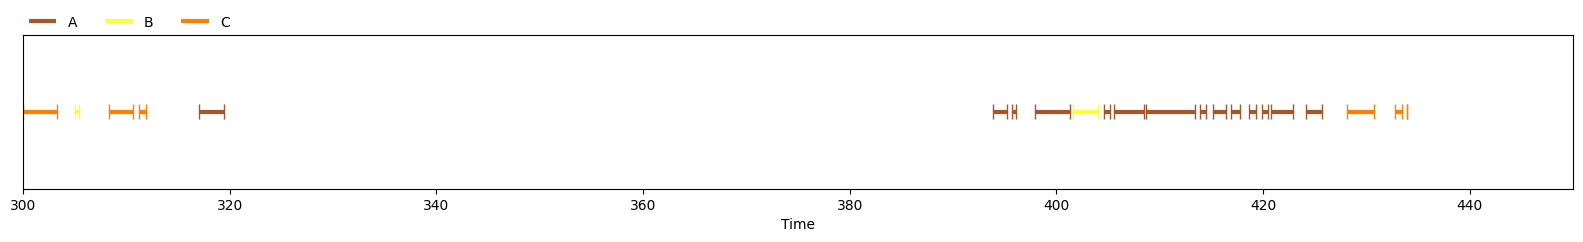

In [10]:
diarization


In [6]:
import csv
csv_file = raw_input('Enter the name of your input file: ES2003a.csv')
txt_file = raw_input('Enter the name of your output file: ES200a.rttm')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

NameError: name 'raw_input' is not defined

In [8]:
# 1. Open the CSV file in reading mode and the TXT file in writing mode
with open('/home/cruz/Speaker_diri/SRU/ES2003a.csv', 'r') as f_in, open('ES2003a.txt', 'w') as f_out:

    # 2. Read the CSV file and store in variable
    content = f_in.read()

    # 3. Write the content into the TXT file
    f_out.write(content)

In [5]:
# load groundtruth
from pyannote.database.util import load_rttm
groundtruth = load_rttm('/home/cruz/Speaker_diri/SRU/ES2003a.wav')[DEMO_FILE['uri']]

# visualize groundtruth
groundtruth


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 24: invalid start byte